# DS4023 Machine Learning : Neural Network Exercise

## Introduction
In this exercise, you will implement the backpropagation algorithm for neural networks and apply it to the task of hand-written digit recognition.

## 1. Data loading and visualization

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
#load and check the data
data = loadmat('ex4data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}


There are 5000 training examples in ex3data1.mat, where each training example is a
20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by
a floating point number indicating the grayscale intensity at that location.
The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each
of these training examples becomes a single row in our data matrix X. This
gives us a 5000 by 400 matrix X where every row is a training example for a
handwritten digit image.

In [3]:
X = data['X']
y = data['y']

X.shape, y.shape#check the shape of your data

((5000, 400), (5000, 1))

In [4]:
def plot_100_image(X):
    """ sample 100 image and show them
    assume the image is square

    X : (5000, 400)
    """
    size = int(np.sqrt(X.shape[1]))

    # sample 100 image, reshape, reorg it
    sample_idx = np.random.choice(np.arange(X.shape[0]), 100)  # 100*400
    sample_images = X[sample_idx, :]

    fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(8, 8))

    for r in range(10):
        for c in range(10):
            ax_array[r, c].matshow(sample_images[10 * r + c].reshape((size, size)),
                                   cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

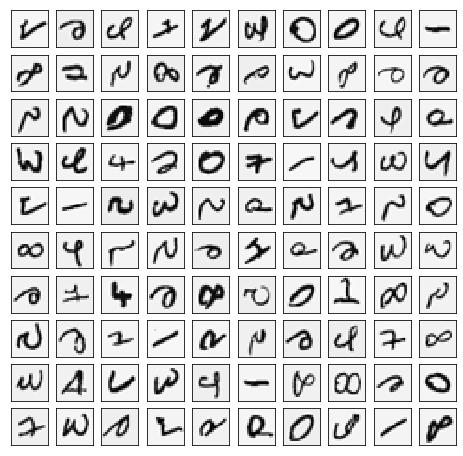

In [5]:
plot_100_image(X)
plt.show()

ToDo:

Please explain here why the above figure looks weird and what did I do in the block below to make it look right?
You explaination goes below:
1. From my perspective, a image in computer vision is represent as pixel * pixel, which is definitely a 2d-array, however, our original data is flattened,which means we squeeze the last dimension and show it into a one dimensional array, so, in order to plot it out, we need to change them back. In the previous code, just reshape the result, back to original size, so the result may be some kind of weird

In [6]:
# for this dataset, you need a transpose to get the orientation right
X = np.array([im.reshape((20, 20)).T for im in X])

# and I flat the image again to preserve the vector presentation
X = np.array([im.reshape(400) for im in X])



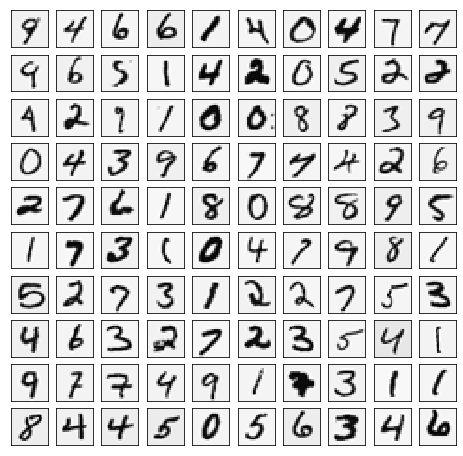

In [7]:
plot_100_image(X)
plt.show()

In [8]:
# following the plot_100_image() function, please implement a plot_image function that take a (400,) shape vector and 
# display it as a 20x20 image
def plot_image(x):
    """ assume the image is square
    display a 20x20 image
    Taking previous sampling as input, and change it to 20*20
    x : (400,)
    
    """
    #complete the following
    size = int(np.sqrt(len(x)))
    fig, ax_array = plt.subplots(nrows=1, ncols=1, sharey=True, sharex=True, figsize=(4, 4))
    plt.imshow(x.reshape(20,20),cmap= matplotlib.cm.binary)

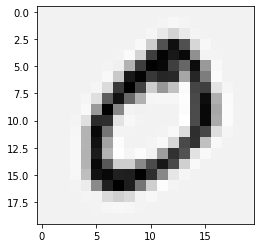

In [9]:
plot_image(X[0])
plt.show()

whereas the original labels
(in the variable y) were 1, 2, ..., 10, for the purpose of training a neural
network, we need to recode the labels as vectors containing only values 0 or
1, so that For example, if $x^{(i)}$
is an image of the digit 5, then the corresponding
$y^{(i)}$
(that you should use with the cost function) should be a 10-dimensional
vector with $y_5$ = 1, and the other elements equal to 0. This is called "one-hot encoding"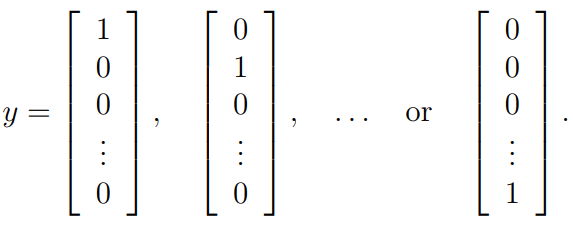

In [10]:
#finish the code below to implement "one-hot" encoding of y
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)
y_onehot.shape

(5000, 10)

In [11]:
# check if you get the correct format of y
y[0], y_onehot[0,:]

(array([10], dtype=uint8), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

## 2. Model Representation

Our neural network is shown in Figure below. It has 3 layers – an input layer,
a hidden layer and an output layer. Recall that our inputs are pixel values
of digit images. Since the images are of size 20 × 20, this gives us 400 input
layer units (not counting the extra bias unit which always outputs 1). The hidden layer has 25 units. And the output layer has 10 units(corresponding to the 10 digit classes).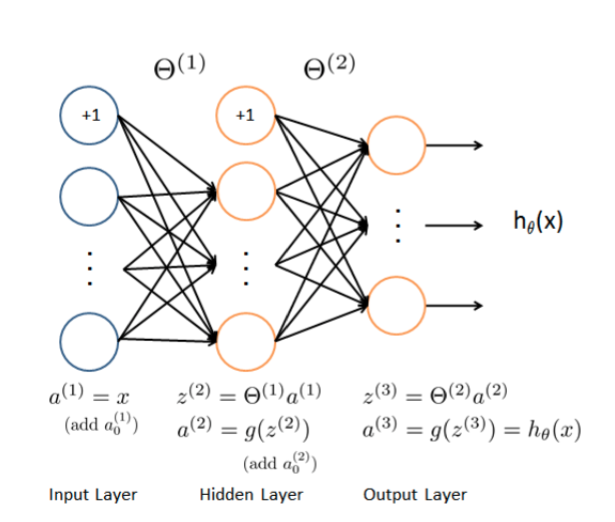


Initialized the network shapes

In [12]:
#  Initialized the shape of the network
input_size = 400
hidden_size = 25
num_labels = 10


### 2.1 Sigmoid function implementation
The activation function we use in this model is the sigmoid function： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 


In [13]:
# Please implement the sigmoid function below
def sigmoid(z):
    return 1/(1 + np.exp(-z))

### 2.2 Feedforward

We need to finish the feed forward calculation of output of th network, following the network model.
The output of each unit is given by: 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 
Pay attention that for input and hidden layer, we need to add a "1" to the original vector, as the bias term.

In [14]:
# Implement the feed forward calculation function below 
# theta1 has size (401, 25)
# theta2 has size (26, 10)
def forward_propagate(X, theta1, theta2):
    
    a1 = np.insert(X,0,1,axis = 1)
    z2 = np.dot(a1,theta1.T)
    a2 = np.insert(sigmoid(z2),0,1, axis = 1)
    z3 = np.dot(a2,theta2.T)
    h = sigmoid(z3)
    return a1, z2, a2, z3, h

### 2.3 Cost funciton

Recall that the cost function for the neural network (without regularization) is
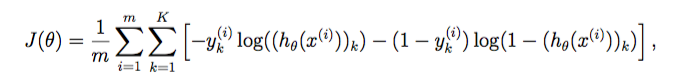

You should implement the feedforward computation that computes $h_\theta(x^{(i)})$
for every example $i$ and sum the cost over all examples. Your code should
also work for a dataset of any size, with any number of labels (you
can assume that there are always at least $K ≥ 3$ labels)

In [15]:
# Implement the cost function below 

def cost(theta1, theta2, X, y):
    m = X.shape[0]
#     X = 
#     y = 
    
    # run the feed-forward pass
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # compute the cost
    #print(-y*np.log(h) - (1 - y)*np.log(1 - h),(-y*np.log(h) - (1 - y)*np.log(1 - h)).shape)
    J = 1/m * np.sum(-y*np.log(h) - (1 - y)*np.log(1 - h))
    
    return J

Now that you have implemented the cost function, before we move on, we should try if our implementation is correct so far. To do the test, please use the parameters theta prepared for you and calculate the cost value in this case.

If you get a cost value equal to approximately 5.83, congratulations you are ok so far and you may move on to the next steps.

In [16]:
import scipy.io as sio
def load_weight(path):
    data = sio.loadmat(path)
    return data['Theta1'], data['Theta2']

In [17]:
theta1, theta2 = load_weight('ex4weights.mat')
print(theta1.shape)
print(theta2.shape)

(25, 401)
(10, 26)


In [18]:
cost(theta1, theta2, X, y_onehot)

5.830351257959723

### 2.4 Regularized Cost function
The cost function for neural networks with regularization is given by
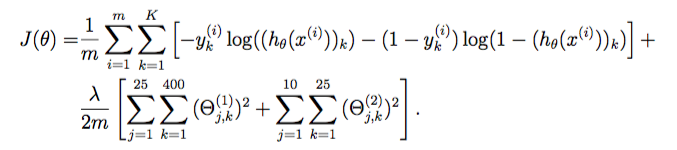

Note that you should not be regularizing the terms that correspond to
the bias. For the matrices theta1 and theta2, this corresponds to the first
column of each matrix. You should now add regularization to your cost
function. Notice that you can first compute the unregularized cost function
$J$  and then later add the cost for the
regularization terms.

In [19]:
def cost_regularized(theta1, theta2, X, y, reg_lambda=1):
    m = X.shape[0]
    
    
    # 
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # compute the cost
    J = cost(theta1,theta2, X,y)
    
    # add the cost regularization term
    J += reg_lambda/(2*m) * (np.sum(theta1[:,1:]**2) + np.sum(theta2[:,1:]**2)) 
    
    return J

To test your implementation, calculate the regularized cost under given theta1 and theta2, if you get a cost roughly at 5.9264, then you can move on

In [20]:
cost_regularized(theta1, theta2,  X, y_onehot, reg_lambda=1)

5.926491951889328

## 3. Backpropagation

Now, you will implement the backpropagation algorithm. Recall that
the intuition behind the backpropagation algorithm is as follows. Given a
training example $(x^{(t)}, y^{(t)})$, we will first run a “forward pass” to compute
all the activations throughout the network, including the output value of the
hypothesis $h_\Theta(x)$. Then, for each node $j$ in layer $l$, we would like to compute
an “error term” $\delta^{(l)}_j$
that measures how much that node was “responsible”
for any errors in our output.
For an output node, we can directly measure the difference between the
network’s activation and the true target value, and use that to define $\delta^{(3)}_j$
(since layer 3 is the output layer). For the hidden units, you will compute
$\delta^{(l)}_j$ based on a weighted average of the error terms of the nodes in layer
$(l + 1)$.
In detail, here is the backpropagation algorithm depicted in figure below. You should implement steps 1 to 4 in a loop that processes one example at a time. Concretely, you should implement a for-loop for $t = 1:m$ and
place steps 1-4 below inside the for-loop, with the $t_{th}$ iteration performing
the calculation on the $t_{th}$ training example $(x^{(t)}, y^{(t)})$. Step 5 will divide the
accumulated gradients by $m$ to obtain the gradients for the neural network
cost function.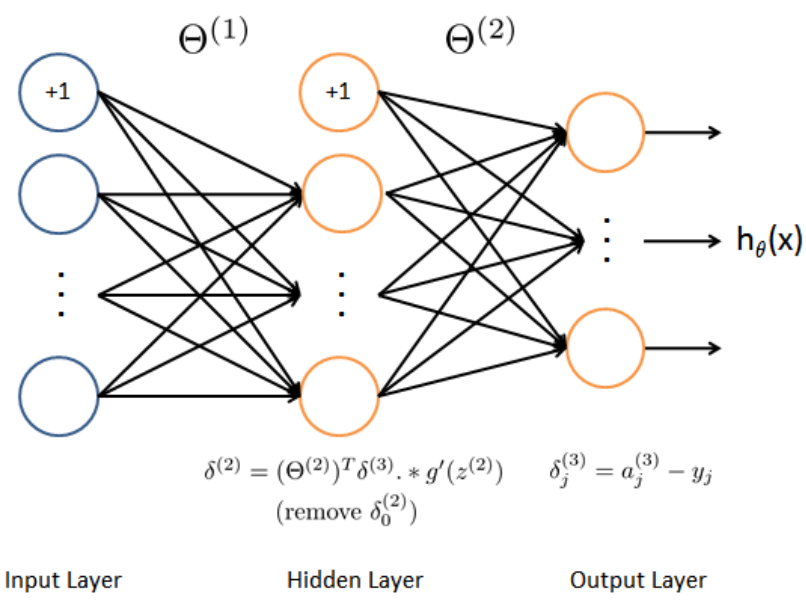

First, let's implment the derivitive function of our $h_\Theta(x)$, i.e. the derivitive of the sigmoid function

In [21]:
# implement the derivitive of sigmoid function below
def sigmoid_gradient(z):
    return sigmoid(z)*(1 - sigmoid(z))

Prepare an initial randomized set of theta vector within range [-0.25, 0.25]

In [22]:
# the theta parameter vector 
params = (np.random.random(size=hidden_size * (input_size + 1) + num_labels * (hidden_size + 1)) - 0.5) * 0.25

# the theta matrix derived from params
theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

In [23]:
theta1.shape, theta2.shape

((25, 401), (10, 26))

### 3.1 steps to implement backprop algorithm (unregularized)
For each data samle $(x^{(t)}, y^{(t)})$ in the dataset $((x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}),..., (x^{(m)}, y^{(m)}))$, put the following steps in a for-loop from $t=1:m$:
1. Set the input layer’s values $(a^{(1)})$ to the $t^{th}$ training example $x^{(t)}$.
Perform a feedforward pass, computing the activations $(z^{(2)}, a^{(2)}, z^{(3)}, a^{(3)})$
for layers 2 and 3. Note that you need to add a +1 term to ensure that the vectors of activations for layers $a^{(1)}$ and $a^{(2)}$ also include the bias unit.

2. For each output unit $k$ in layer 3 (the output layer), set $\delta^{(3)}_k = (a^{(3)}_k-y_k)$ (think about why by following the equations given in the lecture notes),
where $y_k \in \{0, 1\}$ indicates whether the current training example belongs to class $k (y_k = 1)$, or if it belongs to a different class $(y_k = 0)$.

3. For the hidden layer $l = 2$, set $ \delta^{(2)}=(\Theta^{(2)})^T\delta^{(3)}.*g'(z^{(2)}) $, where $.*$ means element-wise multiplication between two vectors of the same size.

4. Calculate $\frac{\partial J^x(\Theta)}{\partial \Theta^{(x,l)}_{ij}} = a^{(x,l)}_j\delta^{(x,l+1)}_i$, accumulate the gradient of each $\theta$ by summation of the results from all $m$ data samples.

Finally, out of the for loop, obtain the (unregularized) gradient for the neural network cost function by dividing the accumulated gradients by $m$, $\frac{\partial J(\Theta)}{\partial \Theta^{(l)}_{ij}} = \frac{1}{m} \Sigma_{x}{a^{(x,l)}_j\delta^{(x,l+1)}_i}$ 


In [24]:
def backprop(params,  X, y):
    m = X.shape[0]
#     X =
#     y = 
    
    # reshape the parameter array into parameter matrices for each layer
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
    
    # run the feed-forward pass
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    z2 = np.array(z2)
    h = np.array(h)
    # initializations
    J = 0
    # m
    delta3 = h - y
    delta2 = np.array(np.dot(delta3.T, a2))
    J_derive_z2 = np.array(np.dot(delta3, theta2[:,1:])) * sigmoid_gradient(z2)
    delta1 = J_derive_z2.T @ a1
    #print(delta1.shape, delta2.shape)
    ## compute the cost
    for i in range(m):
        J += np.sum(-y[i]*np.log(h[i]) - (1-y[i]) * np.log(1-h[i]))
    J /=m
    
        
#     # perform backpropagation
#     for t in range(m):
#            ...
    grad = 1/m * np.r_[delta1.flatten(), delta2.flatten()]
    
    return J, grad

When implementing the back propagation funtion, you may need a lot of vector multiplication or element-wise vector multiplication, pay attetion to the difference and always check whether the result has the correct shape as you expected.

In [25]:
J, grad = backprop(params, X, y_onehot)
J, grad.shape

(7.223982684529968, (10285,))

You may not get exactly the same cost as above, it is normal, why?
#######################################
Explain below:
Since we initial the theta randomly, so every time I run the code, the theta has a little bit different

### 3.2 Gradient Checking (optional, 20 additional points)
In your neural network, you are minimizing the cost function $J(\Theta)$.  To
perform gradient checking on your parameters, you can imagine “unrolling”
the parameters $\Theta^{(1)}$, $\Theta^{(2)}$ into a long vector $\theta$. By doing so, you can think of
the cost function being $J(\theta)$ instead and use the following gradient checking
procedure.

Suppose you have a function $f_i(\theta)$ that compute the gradient, you’d like to check if $f_i$
is outputting correct derivative values.
 
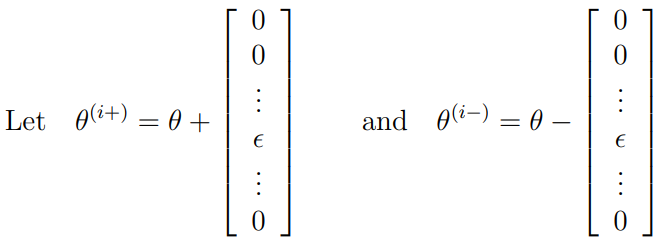

So, $\theta^{(i+)}$ is the same as $\theta$, except its $i$-th element has been incremented by
$\epsilon$. Similarly, $\theta^{(i-)}$
is the corresponding vector with the $i$-th element decreased
by $\epsilon$. You can now numerically verify $f_i(\theta)$'s correctness by checking, for each
$i$, that:
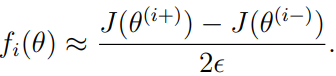
The degree to which these two values should approximate each other will
depend on the details of $J$. But assuming $\epsilon = 10^{−4}$
, you’ll usually find that the left- and right- hand sides of the above will agree to at least 4 significant
digits (and often many more).

When performing gradient checking, it is much more
efficient to use a small neural network with a relatively small number
of input units and hidden units, thus having a relatively small number
of parameters.

In [26]:
def expand_array(arr):
    """replicate array into matrix
    [1, 2, 3]

    [[1, 2, 3],
     [1, 2, 3],
     [1, 2, 3]]
    """
    # turn matrix back to ndarray
    return np.array(np.matrix(np.ones(arr.shape[0])).T @ np.matrix(arr))

In [27]:
def gradient_checking(params, X, y, epsilon, regularized=False):
    def numeric_grad_approximate(theta1, theta2, theta1_c, theta2_c):
        if regularized == False:
            return (cost(theta1, theta2,X,y) - cost(theta1_c, theta2_c, X,y))/(2*epsilon)
        else:
            return (cost_regularized(theta1, theta2,X,y) - cost_regularized(theta1_c, theta2_c, X,y))/(2*epsilon)
    numeric_grad = []
    for i in range(len(params)):
        params_tmp_head = params.copy()
        params_tmp_tail = params.copy()
        
        params_tmp_head[i] = params_tmp_head[i]-epsilon
        params_tmp_tail[i] = params_tmp_tail[i]+epsilon
        theta1_head = np.matrix(np.reshape(params_tmp_head[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
        theta2_head = np.matrix(np.reshape(params_tmp_head[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
        theta1_tail = np.matrix(np.reshape(params_tmp_tail[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
        theta2_tail = np.matrix(np.reshape(params_tmp_tail[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
        numeric_grad.append(numeric_grad_approximate(np.array(theta1_tail),np.array(theta2_tail),np.array(theta1_head), np.array(theta2_head)))

    numeric_grad = np.array(numeric_grad)
    # analytical grad will depend on if you want it to be regularized or not
    _, analytic_grad = backprop_reg(params, X, y) if regularized else backprop(params, X, y)

    # If you have a correct implementation, and assuming you used EPSILON = 0.0001
    # the diff below should be less than 1e-9
    # this is how original matlab code do gradient checking
    diff = np.linalg.norm(numeric_grad - analytic_grad) / np.linalg.norm(numeric_grad + analytic_grad)

    print('If your backpropagation implementation is correct,\nthe relative difference will be smaller than 10e-9 (assume epsilon=0.0001).\nRelative Difference: {}\n'.format(diff))


Running the gradient checking function may take several minutes, why? Please write your answer below:

Because: We need to calculate a lot of numerical gradient, so in each iteration we will done the processing ,which definitely lead to a lot time cost.

In [28]:
# gradient_checking(params, X, y_onehot, epsilon= 0.0001)#very slow, around 10 minutes

### 3.3 Regularized version of the back propagation function
Now we add the regularization terms to the gradients as stated in the lecture notes.

In [29]:
def backprop_reg(params, X, y, reg_lambda=1):
    m = X.shape[0]
#     X =
#     y = 
    # will not penalize the bias 
    theta1 = np.array(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.array(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    theta2_tmp = theta2.copy()
    theta2_tmp[:,0] = 0
    theta1_tmp = theta1.copy()
    theta1_tmp[:,0] = 0
    delta3 = h-y
    delta2 = 1/m * np.array(np.dot(delta3.T, a2)) + reg_lambda/m * theta2_tmp
    J_derive_z2 = np.array(np.dot(delta3, theta2[:,1:])) * sigmoid_gradient(z2)
    delta1 = 1/m * (J_derive_z2.T @ a1) + reg_lambda/m * theta1_tmp
    # we just need to add the regularize point at last
    # calculate the cost
    J = 0
    for i in range(m):
        J += np.sum(-y[i]*np.log(h[i]) - (1-y[i]) * np.log(1-h[i]))
    J /= m
    J += reg_lambda/(2*m) *(np.sum(theta1[:,1:]**2) + np.sum(theta2[:,1:]**2)) 
    return J,  np.r_[delta1.flatten(), delta2.flatten()]

In [30]:
J, grad = backprop_reg(params, X, y_onehot, 1)
J, grad.shape

(7.229365081732877, (10285,))

In [31]:
# do the gradient checking for regularized cost functions
# gradient_checking(params, X, y_onehot, epsilon= 0.0001,regularized=True)#very slow, around 10 minutes

## 4. Training the network
If everything goes well, it means you have correctly implemented the cost function and backpropagation algorithm to calculate gradients in each iteration, now we are ready to train the network. We can use an optimization function directly from scipy.optimize package, like what we do in logistic regress exercise.

You can try to train the network with both backpropagation with/without regularization and see the differences.

In [35]:
from scipy.optimize import minimize
#params = np.concatenate((np.ravel(theta1), np.ravel(theta2)))
# minimize the objective function
fmin = minimize(fun=backprop_reg, x0=params, args=(X, y_onehot), 
                method='TNC', jac=True, options={'maxiter': 250})
fmin

     fun: 0.028733764531835317
     jac: array([ 6.82638392e-04,  0.00000000e+00,  6.91296915e-12, ...,
        5.41135954e-05,  1.01071499e-04, -1.45178622e-04])
 message: 'Max. number of function evaluations reached'
    nfev: 250
     nit: 23
  status: 3
 success: False
       x: array([ 0.01584679, -0.07297011,  0.11308193, ..., -1.35271178,
       -0.13292244, -0.60694324])

Sometimes, the "success" tag may have value "False" instead of "True", which indicates the optimization doesn't converge within the limited iteration numbers. This does not mean the result cannot be used. For this application and dataset, if your optimization returns error value in "fun" less than 0.5, you can already get pretty good results in the digit classification task.

Now let's use the optimized parameters to predict hand writing digits in our dataset.

In [36]:
par = fmin.x
theta1 = np.matrix(np.reshape(par[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
theta2 = np.matrix(np.reshape(par[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
y_pred = np.array(np.argmax(h, axis=1) + 1)
y_pred

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=int64)

Check the accuracy of your network in prediction

In [37]:
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, y)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ('accuracy = {0}%'.format(accuracy * 100))

accuracy = 99.94%


You don't necessarily get 100% because the optimization result may be different depending on the initial value and optimization method used. But the whole pipeline, if implemented correctly, should achieve an accuracy above 95%.